# 動画処理と動画解析

## 色検出
- HSV を使用して指定した color だけを抜きとるプログラミング処理
- 今回は黄色を抜き出す

In [1]:
import cv2
import sys
import matplotlib.pyplot as plt

In [2]:
# 動画を再生させる前段階の設定。読み込みと表示のさせ方
cap = cv2.VideoCapture("data/movie/Mobility.mp4")                 # 1
if  cap.isOpened() == False:                                      # 2
    sys.exit()                                                    # 3
ret, frame = cap.read()                                           # 4
h, w = frame.shape[:2]                                            # 5
fourcc = cv2.VideoWriter_fourcc(*"XVID")                           # 6
dst = cv2.VideoWriter("output/test.avi1", fourcc, 30.0, (w, h))   # 7

# 動画再生のプログラム
while True:
    ret, frame = cap.read()    # 8
    if ret == False:           # 9
        break
    cv2.imshow("img", frame)   # 10
    dst.write(frame)           # 11
    if cv2.waitKey(30) == 27:  # 12
        break
cv2.destroyAllWindows()        # 13
cv2.waitKey(1)
cap.release()                  # 14

### 色検出前 video image

([], [])

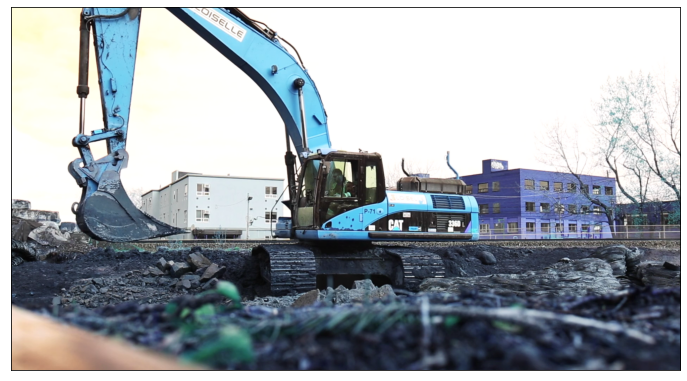

In [3]:
fn = r'static/video/Mobility_sample.png'
img = cv2.imread(fn)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.xticks(ticks=[])
plt.yticks(ticks=[])

###  **OpenCV で画像を扱う場合の注意点**
- 色の成分の並び(順番)がBGR（Blue, Green, Red）
    - OpenCVの仕様


### **BGR　->　RGBへ変換**
- 一旦　numpy の配列になったらスライスなどで、自由に変形できる

In [4]:
import numpy as np

([], [])

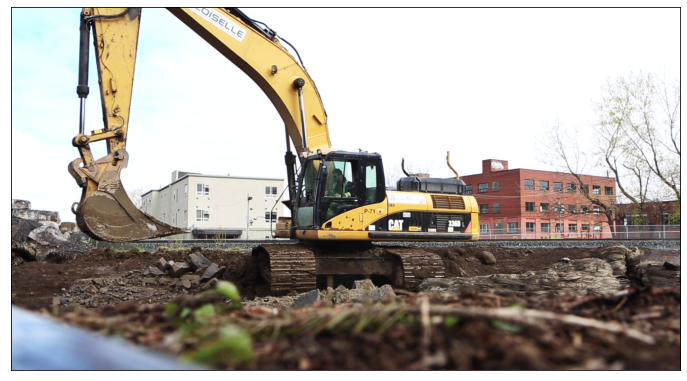

In [5]:
plt.figure(figsize=(12, 8))
plt.imshow(img[:, :, [2, 1, 0]])
plt.xticks(ticks=[])
plt.yticks(ticks=[])

In [6]:
# 行 : 列 : 色チャンネル /　全ての行・列に対して、色チャンネルの順番を逆転した形で並べる
imRGB = img[:, :, [2, 1, 0]]

([], [])

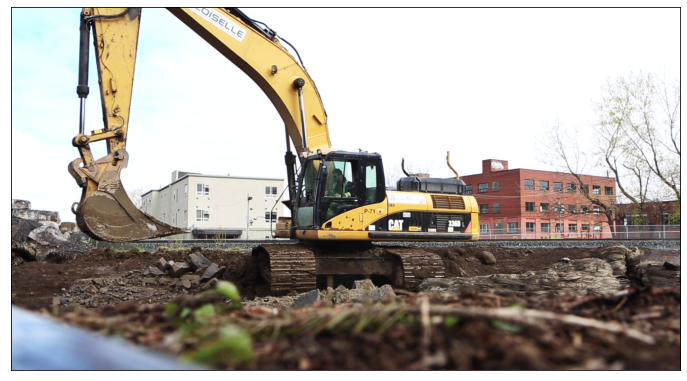

In [7]:
plt.figure(figsize=(12, 8))
plt.imshow(imRGB)
plt.xticks(ticks=[])
plt.yticks(ticks=[])

### 素材動画の再生 code 解析

#### 動画の読み込み・表示の設定

1. 動画の読み込み
2. 正しく読み込めたかどうかを判定： False の場合はプログラムから抜ける
3. 正しく読み込まれなかったら = False : プログラムから抜ける exit する
4. 1 frame だけ動画を読み込む
    - ret = return の略で真偽値(True or False)が入る。正しく読み込めたら True そうでなければ False
5. のちの設定の為に frame の情報を抽出する
    - h, w の順番で取得している : frame は y, x, color の順番で格納されているから
6. 書き込みの設定
7. 動画の書き込み（出力先：コーデック設定：FPSの設定１秒間に何フレーム進めるか：動画の解像度）

#### 動画の再生プログラム

8. cap から frame を読み込んでくる
9. ちゃんと読み込めなかった場合 -> 最後の frame を読み込んで再度読み込みに cap.read（）を使用すると False が帰ってくるので　break する
10. 上記が　True であれば、 cv2.imshow によって動画の１コマを再生させる
11. dst で設定した動画を書き込む
12. よく使用する技で、 30ms 待つ。その間に　２７　= esc　key が押されれば途中でも break する
    - cv2.waiKeyは引数の数値だけ処理を待つという関数
    - 数値の単位はms(ミリセカンド)例えば cv2.waitKey(1000)であれば1秒待つ
    - 引数が0の場合は特別で、0秒待つという意味ではなく、キーボードが押されるまでずっと処理を待つという意味
13. cv2.destroyAllWindowsは、全てのウィンドウを閉じるという関数
14. release はメモリの解放

In [8]:
import cv2
import numpy as np

In [9]:
cap = cv2.VideoCapture("data/movie/Mobility.mp4")
while True:
    cv2.namedWindow("img", cv2.WINDOW_NORMAL)               # 1
    cv2.resizeWindow("img", 640, 480)
    ret, frame = cap.read()                                 # 2
    if ret == False:                                        # 3
        break
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)            # 4
    lower = np.array([20, 50, 50])                          # 5
    upper = np.array([255, 255, 255])                       # 6
    frame_mask = cv2.inRange(hsv, lower, upper)             # 7
    dst = cv2.bitwise_and(frame, frame, mask = frame_mask)  # 8
    cv2.imshow("img", dst)                                  # 9
    if cv2.waitKey(10) == 27:                               # 10
        break
cv2.destroyAllWindows()
cv2.waitKey(1)
cap.release()   

### 処理後の動画画像

([], [])

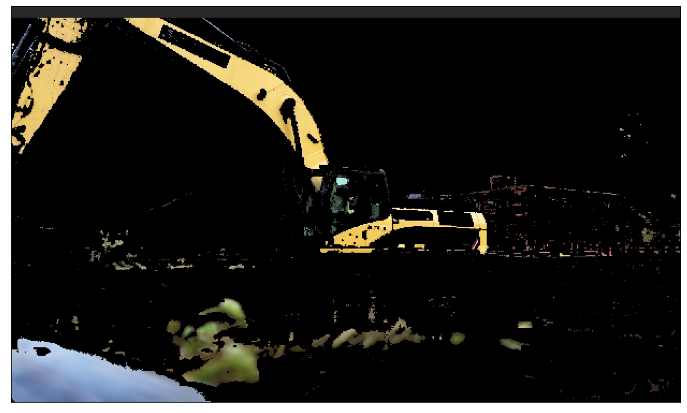

In [10]:
fn1 = r'static/video/Mobility1.png'
img1 = cv2.imread(fn1)
img1RGB = img1[:, :, [2, 1, 0]]
plt.figure(figsize=(12, 8))
plt.imshow(img1RGB)
plt.xticks(ticks=[])
plt.yticks(ticks=[])

([], [])

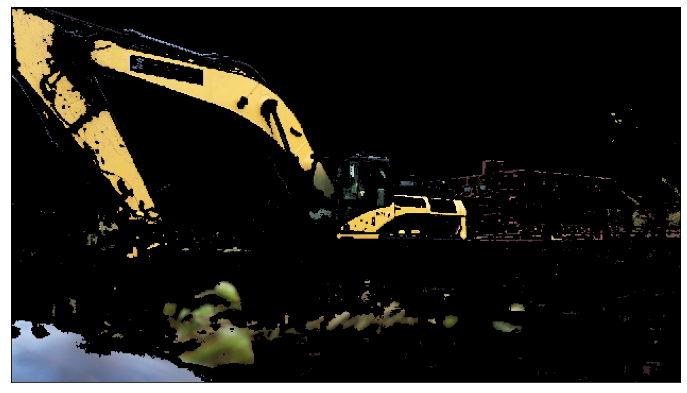

In [11]:
fn2 = r'static/video/Mobility2.png'
img2 = cv2.imread(fn2)
img2RGB = img2[:, :, [2, 1, 0]]
plt.figure(figsize=(12, 8))
plt.imshow(img2RGB)
plt.xticks(ticks=[])
plt.yticks(ticks=[])

#### 上手く黄色だけを抜き出すことが出来ている
- 多少彩度が低い色も混じっているが検出は出来ている

#### <u>inRangeを使用することにより特定の色を抽出することができる</u>

### 色検出 code 解析
1. 今回の動画は大きいので window size を小さくしておく
2. cap.read を使用して読み込んでいく
3. 最終　frame の場合は抜ける(そこで終了: break)
4. hsv　変数に先程読み込んだ frame(color) を BGR -> HSV に変換して代入する
5. color yellow を抜き出す / numpy array で黄色の下限値を抜き出す
    - ※ HSV の H(Heu:色相) は通常の半分の値しかないので注意する
    - S(saturation：彩度)の値が低すぎると白っぽくなるので適当な値を入れる
    - V(value:明度)の値が低すぎると黒っぽくなるので適当な値を入れる
6. 上限値
7. mask を作成。 inRange　で hsvに変換した frame と定義した黄色を渡す
    - これで　frame_mask だけに黄色っぽい色が保存される
8. 2値画像の論理積を取得している(同じもの、共通のモノ)
    - 論理積(AND)、論理和(OR)、否定(NOT)を使うと他の論理演算も定義できる
    - <u>mask = 定義した frame_mask を引数に入れることにより、黄色だけが検出される</u>
9. 画像表示の dafualt 記述
10. esc key(27) を押したら抜ける(終了させる)
    
#### HSV
  - H（Hue）:色相 0-359
    - 角度によって色の種類を表す
  - S（Saturation）:彩度 0-100%
    - Hue で指定した色がどれくらい含まれているのかを％で表す
  - V（Value）:明度 0-100%
    - 色の明るさを表ている
  - HSVでのメリットは色が表しやすい
    - H：３０〜６０で黄色っぽい色を抜き出す事ができる
    - これをRGBで表そうとするとすごく手間がかかる
#### <u>Open CV では…（注意点）</u>
  - H：０−１７９　（0-359/2= 179）360/2=180：通常の定義の半分で表される
  - S：０−２５５
  - V：０−２５５
  - **整数しか扱えない**：２５６段階しか扱えないという制約上。上記のような表し方になっている